In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://huggingface.co/datasets/nprak26/remote-worker-productivity/raw/main/remote_work_productivity.csv"
df = pd.read_csv(url)

In [3]:
relevant_columns = ['Age', 'Years_Experience', 'Work_Hours_Per_Week', 'Productivity_Score', 
                    'Meetings_Per_Week', 'Job_Satisfaction', 'Education_Level', 'Department', 
                    'Job_Level', 'Has_Children', 'Location_Type', 'Company_Size', 'WFH_Days_Per_Week']
df = df[relevant_columns]

In [4]:
total_missing = df.isnull().sum().sum()
print(f"Total missing values: {total_missing}")

Total missing values: 0


In [5]:
# categorical columns for encoding ( OneHot)
cat_cols = ['Has_Children', 'Location_Type']
df_cat = df[cat_cols]

In [6]:
# Apply OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(df_cat)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))

In [7]:
# Combine encoded columns with the rest of the df, dropping original categorical columns
df_encoded = pd.concat([df.drop(columns=cat_cols), encoded_df], axis=1)

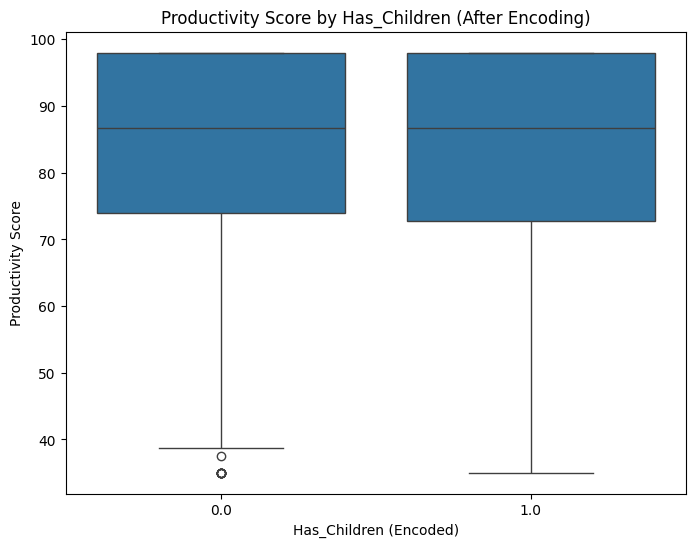

In [8]:
# Boxplot of Productivity_Score by encoded Has_Children
plt.figure(figsize=(8, 6))
sns.boxplot(x='Has_Children_Yes', y='Productivity_Score', data=df_encoded)
plt.title("Productivity Score by Has_Children (After Encoding)")
plt.xlabel("Has_Children (Encoded)")
plt.ylabel("Productivity Score")
plt.savefig("../results/eda_visualizations/productivity_by_has_children_encoded.png")
plt.show()

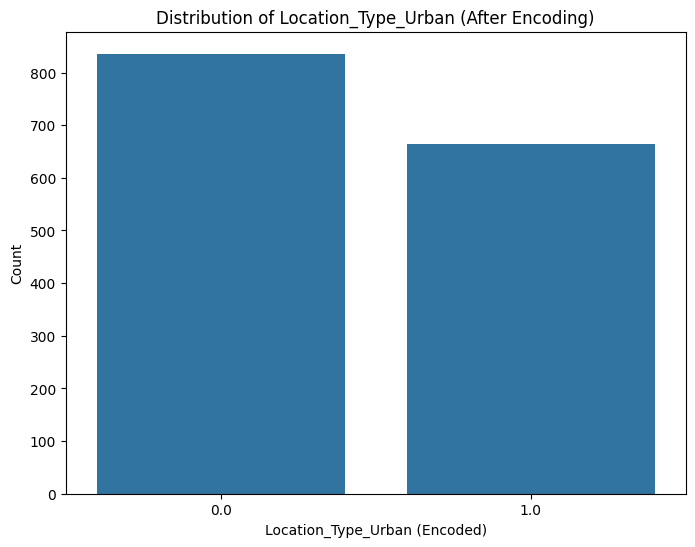

In [9]:
# Countplot of Location_Type_Urban
plt.figure(figsize=(8, 6))
sns.countplot(x='Location_Type_Urban', data=df_encoded)
plt.title("Distribution of Location_Type_Urban (After Encoding)")
plt.xlabel("Location_Type_Urban (Encoded)")
plt.ylabel("Count")
plt.savefig("../results/eda_visualizations/location_type_urban_distribution_encoded.png")
plt.show()